In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Sourcing
https://www.kaggle.com/ <br>
https://www.airlinequality.com/review-pages/a-z-airline-reviews/

### Data loading

In [471]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CSCI_B_565/Project/Final/Airline-Dataset.csv", index_col=0)

In [422]:
data.head()

,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


### Data Cleaning



#### Outliers: <br>
We have an outlier in the data. There is one single entry for year 1970, rest are from 2011 to 2015. We can remove the outlier from the dataset.

In [472]:
data.loc[data["Year"] == 1970]

,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
11620,british-airways,Russ King,United Kingdom,SIN-LHR BA12 B747-436 First Class. Old aircraf...,First Class,4.0,4.0,5.0,5.0,2.0,2.0,1,1970,0


In [473]:
data.drop(data.loc[data["Year"] == 1970].index , inplace=True)

Here we remove the 'content' column which we identified as comments of the travellers. We can do Sentimental analysis in it to identify weather the comment is positive, negative, or neutral. The sentimental analysis results are in different Notebook.

In [474]:
review = data.pop('content')

In [475]:
review

0        Outbound flight FRA/PRN A319. 2 hours 10 min f...
1        Two short hops ZRH-LJU and LJU-VIE. Very fast ...
2        Flew Zurich-Ljubljana on JP365 newish CRJ900. ...
3        Adria serves this 100 min flight from Ljubljan...
4        WAW-SKJ Economy. No free snacks or drinks on t...
                               ...                        
41207    Gdansk - Turku. I recognise all the comments h...
41210    I travelled from Bourgas/Luton 2 weeks ago on ...
41213    Luton to Budapest. Aware of the draconian appl...
41216    VNO to LTN. The flight departed 6:10am in the ...
41217    We fly often with Wizzair and this is purely a...
Name: content, Length: 27283, dtype: object

In [476]:
data.head()

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,adria-airways,E Albin,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,adria-airways,Tercon Bojan,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,adria-airways,L James,Poland,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


#### Merging Columns:
Lets merge 'Month' and 'Year' column, in the format: 'MM.YYYY' and name it 'date' and drop the individual columns.

In [477]:
data["date"] = (data['Month'].astype(str) +"/"+ data["Year"].astype(str))

In [478]:
data.drop('Month', axis = 1, inplace=True)
data.drop('Year', axis = 1, inplace=True)

In [479]:
data.shape

(27283, 12)

In [148]:
data.head()

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,date
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,1,4.2015
1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,1.2015
2,adria-airways,E Albin,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,1,9.2014
3,adria-airways,Tercon Bojan,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,1,9.2014
4,adria-airways,L James,Poland,Economy,4.0,4.0,2.0,1.0,2.0,2.0,0,6.2014


### Exploratory Data Analysis

References:
1. https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/
2. https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
3. https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
4. https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/
5. https://chart-studio.plotly.com/~i/26/yes-or-no/#/

#### Columns

In [149]:
data.columns

Index(['airline_name', 'author', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'recommended', 'date'],
      dtype='object')

#### Unique Values

In [150]:
for col in data.columns:
  print(data[col].unique())

['adria-airways' 'aegean-airlines' 'aer-lingus'
 'aeroflot-russian-airlines' 'aerolineas-argentinas' 'aeromexico'
 'aerosur' 'aigle-azur' 'air-algerie' 'air-arabia' 'air-astana'
 'air-bagan' 'air-berlin' 'air-botswana' 'air-busan' 'air-canada'
 'air-canada-rouge' 'air-caraibes' 'air-china' 'air-corsica'
 'air-dolomiti' 'air-europa' 'air-france' 'air-india' 'air-india-express'
 'air-koryo' 'air-labrador' 'air-macau' 'air-madagascar' 'air-malta'
 'air-mauritius' 'air-mediterranee' 'air-moldova' 'air-namibia'
 'air-new-zealand' 'air-niugini' 'air-nostrum' 'air-serbia'
 'air-seychelles' 'air-tahiti-nui' 'air-transat' 'air-vanuata'
 'air-zimbabwe' 'airasia' 'airasia-x' 'airasia-zest' 'airbaltic'
 'air-blue' 'aircalin' 'airnorth' 'alaska-airlines' 'alitalia'
 'allegiant-air' 'american-airlines' 'american-eagle'
 'ana-all-nippon-airways' 'anadolujet' 'arik-air' 'arkefly'
 'arkia-israeli' 'asiana-airlines' 'asky-airlines' 'atlantic-airways'
 'atlasjet-airlines' 'austrian-airlines' 'avianca' 'a

In [151]:
data.shape

(27283, 12)

In [152]:
data.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
count,27283.000000,27283.000000,27283.000000,27283.000000,27283.000000,27283.000000,27283.000000
mean,6.067954,3.259539,3.522890,3.016420,2.553128,3.411465,0.603893
std,3.216101,1.351706,1.460052,1.515076,1.696036,1.440928,0.489096
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,7.000000,4.000000,4.000000,3.000000,3.000000,4.000000,1.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [153]:
data.isnull().sum()

airline_name                     0
author                           0
author_country                   0
cabin_flown                      0
overall_rating                   0
seat_comfort_rating              0
cabin_staff_rating               0
food_beverages_rating            0
inflight_entertainment_rating    0
value_money_rating               0
recommended                      0
date                             0
dtype: int64

As we can see above, there are no missing values in the columns. 

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27283 entries, 0 to 41217
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   27283 non-null  object 
 1   author                         27283 non-null  object 
 2   author_country                 27283 non-null  object 
 3   cabin_flown                    27283 non-null  object 
 4   overall_rating                 27283 non-null  float64
 5   seat_comfort_rating            27283 non-null  float64
 6   cabin_staff_rating             27283 non-null  float64
 7   food_beverages_rating          27283 non-null  float64
 8   inflight_entertainment_rating  27283 non-null  float64
 9   value_money_rating             27283 non-null  float64
 10  recommended                    27283 non-null  int64  
 11  date                           27283 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usag

In [155]:
data.head(2)

,airline_name,author,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended,date
0,adria-airways,D Ito,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,1,4.2015
1,adria-airways,Ron Kuhlmann,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,1.2015


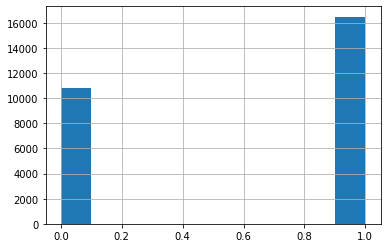

In [156]:
data['recommended'].hist()

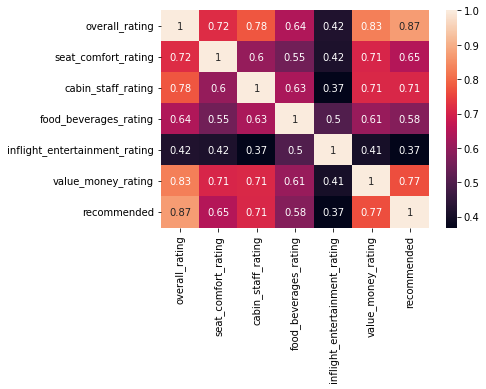

In [157]:
sns.heatmap(data.corr(),annot=True)

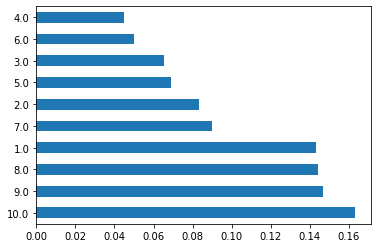

In [158]:
# Let's calculate the percentage of each job status category.
data.overall_rating.value_counts(normalize=True)

#plot the bar graph of percentage job categories
data.overall_rating.value_counts(normalize=True).plot.barh()
plt.show()

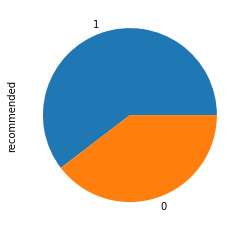

In [159]:
#calculate the percentage of each education category.
data.recommended.value_counts(normalize=True)

#plot the pie chart of education categories
data.recommended.value_counts(normalize=True).plot.pie()
plt.show()

In [160]:
data.overall_rating.describe()

count    27283.000000
mean         6.067954
std          3.216101
min          1.000000
25%          3.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: overall_rating, dtype: float64

#### Bivariate Analysis

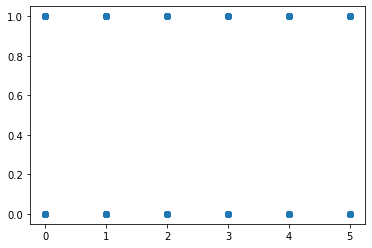

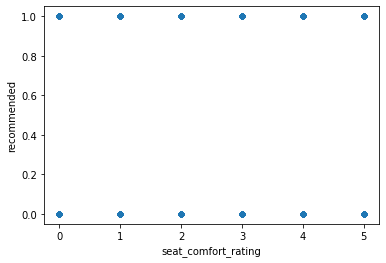

In [161]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.seat_comfort_rating,data.recommended)
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="seat_comfort_rating",y="recommended")
plt.show()

In [162]:
# #plot the scatter plot of balance and salary variable in data
# plt.scatter(data.airline_name, data.recommended)
# plt.show()

# #plot the scatter plot of balance and age variable in data
# data.plot.scatter(x="recommended",y="airline_name")
# plt.show()
# Create a sample dataframe with an text index
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['airline_name'],columns=data['recommended'])
print(CrosstabResult)

recommended                    0    1
airline_name                         
adria-airways                  1   16
aegean-airlines               37  137
aer-lingus                    89  207
aeroflot-russian-airlines     46  149
aerogal-aerolineas-galapagos   0    2
...                           ..  ...
wizz-air                      43   68
wow-air                        6   21
xiamen-airlines                4    5
xl-airways-france              4   14
yangon-airways                 0    1

[292 rows x 2 columns]


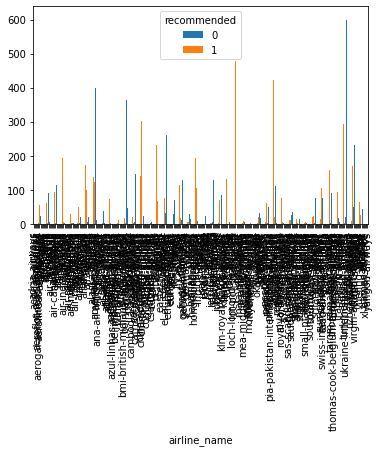

In [163]:

# Grouped bar chart between GENDER and APPROVE_LOAN
# %matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar()

In [164]:
CrosstabResult=pd.crosstab(index=data['overall_rating'],columns=data['recommended'])
print(CrosstabResult)

recommended        0     1
overall_rating            
1.0             3892    14
2.0             2242    29
3.0             1725    57
4.0             1085   141
5.0             1222   663
6.0              445   924
7.0              159  2292
8.0               29  3903
9.0                4  4004
10.0               4  4449


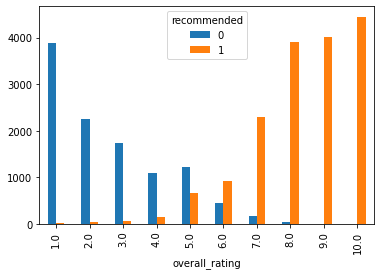

In [165]:
CrosstabResult.plot.bar()

In [166]:
CrosstabResult=pd.crosstab(index=data['cabin_flown'],columns=data['value_money_rating'])
print(CrosstabResult)


value_money_rating  0.0   1.0   2.0   3.0   4.0   5.0
cabin_flown                                          
Business Class       42   529   521   838  1459  1940
Economy             275  2931  2503  3538  5023  5560
First Class           4   115    84   111   190   246
Premium Economy       2   311   181   176   316   388


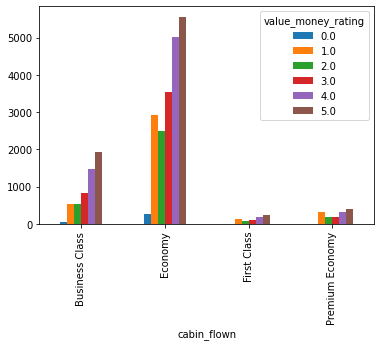

In [167]:
CrosstabResult.plot.bar()

In [168]:
CrosstabResult=pd.crosstab(index=data['cabin_flown'],columns=data['overall_rating'])
print(CrosstabResult)

overall_rating   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
cabin_flown                                                                
Business Class    401   299   304   228   371   289   503   853   959  1122
Economy          3159  1807  1353   906  1390   981  1775  2796  2732  2931
First Class        83    55    43    33    42    29    65    94   130   176
Premium Economy   263   110    82    59    82    70   108   189   187   224


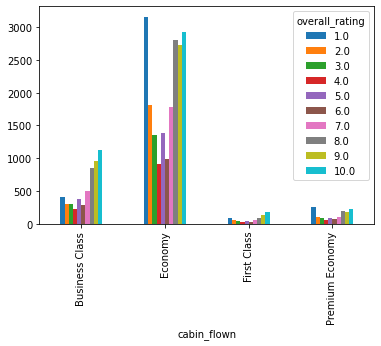

In [169]:
CrosstabResult.plot.bar()

In [170]:
CrosstabResult=pd.crosstab(index=data['cabin_flown'],columns=data['recommended'])
print(CrosstabResult)

recommended         0      1
cabin_flown                 
Business Class   1555   3774
Economy          8397  11433
First Class       249    501
Premium Economy   606    768


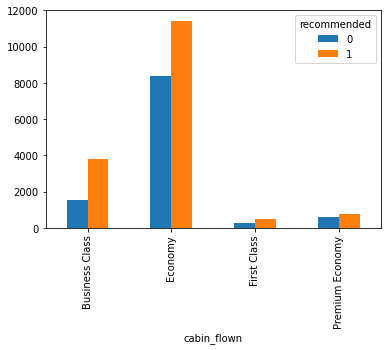

In [171]:
CrosstabResult.plot.bar()

In [172]:
telecom6 = data.groupby('airline_name')['recommended'].sum()
telecom6 = telecom6.div(telecom6.sum().astype(float)).round(2)*100
telecom6 

airline_name
adria-airways                   0.0
aegean-airlines                 1.0
aer-lingus                      1.0
aeroflot-russian-airlines       1.0
aerogal-aerolineas-galapagos    0.0
                               ... 
wizz-air                        0.0
wow-air                         0.0
xiamen-airlines                 0.0
xl-airways-france               0.0
yangon-airways                  0.0
Name: recommended, Length: 292, dtype: float64

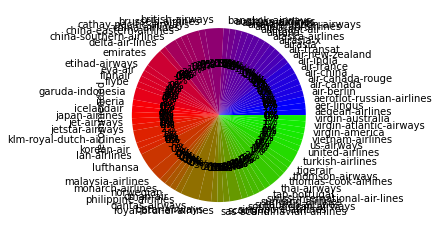

In [173]:
telecom6.plot.pie(colormap='brg', autopct='%1.0f%%') 

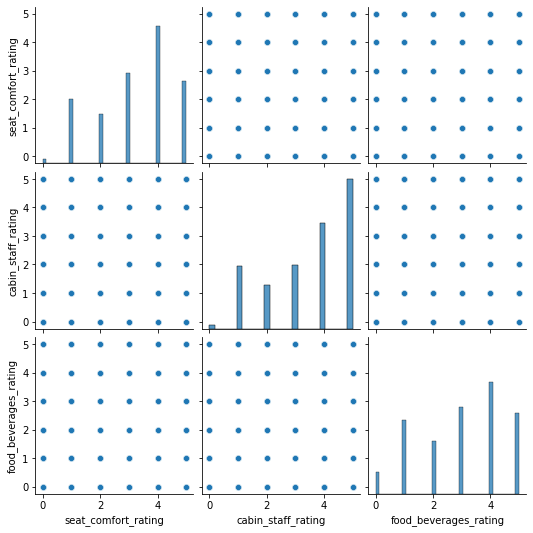

In [174]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['seat_comfort_rating','cabin_staff_rating','food_beverages_rating'])
plt.show()

In [175]:
data.groupby('overall_rating')['recommended'].mean()

overall_rating
1.0     0.003584
2.0     0.012770
3.0     0.031987
4.0     0.115008
5.0     0.351724
6.0     0.674945
7.0     0.935129
8.0     0.992625
9.0     0.999002
10.0    0.999102
Name: recommended, dtype: float64

In [176]:
data.groupby('overall_rating')['recommended'].median()

overall_rating
1.0     0.0
2.0     0.0
3.0     0.0
4.0     0.0
5.0     0.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
Name: recommended, dtype: float64

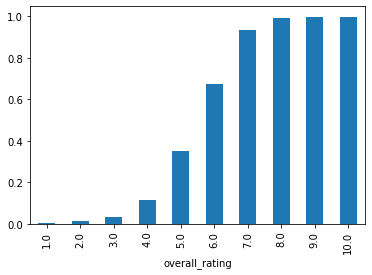

In [177]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('overall_rating')['recommended'].mean().plot.bar()
plt.show()

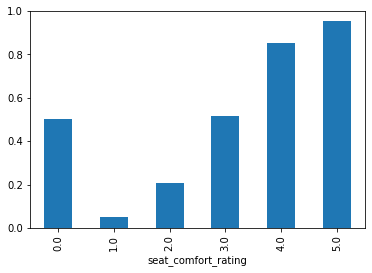

In [178]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('seat_comfort_rating')['recommended'].mean().plot.bar()
plt.show()

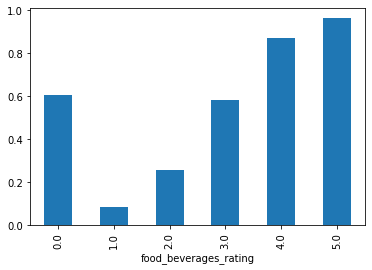

In [179]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('food_beverages_rating')['recommended'].mean().plot.bar()
plt.show()

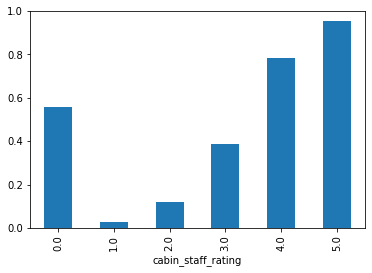

In [180]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('cabin_staff_rating')['recommended'].mean().plot.bar()
plt.show()

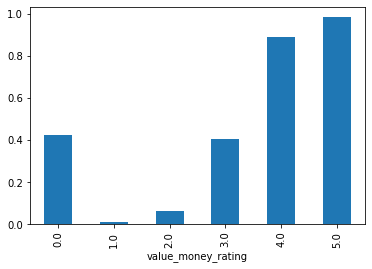

In [181]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('value_money_rating')['recommended'].mean().plot.bar()
plt.show()

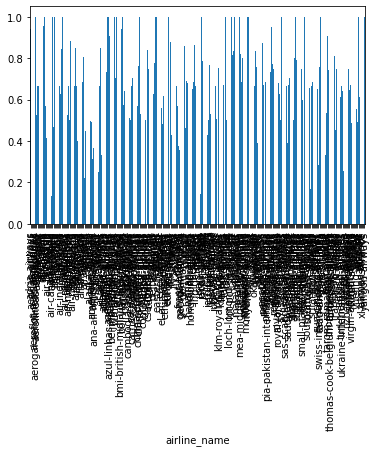

In [182]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('airline_name')['recommended'].mean().plot.bar()
plt.show()

#### Multivariate Analysis

overall_rating          1.0       2.0       3.0       4.0       5.0   \
value_money_rating                                                     
0.0                 0.000000  0.021739  0.037037  0.086957  0.208333   
1.0                 0.001096  0.001522  0.006757  0.011905  0.200000   
2.0                 0.001401  0.013105  0.022535  0.040100  0.186441   
3.0                 0.012903  0.012821  0.045603  0.118613  0.308197   
4.0                 0.063492  0.063830  0.042735  0.270270  0.509761   
5.0                 0.117647  0.142857  0.277778  0.708333  0.600000   

overall_rating          6.0       7.0       8.0       9.0       10.0  
value_money_rating                                                    
0.0                 0.588235  0.900000  1.000000  1.000000  1.000000  
1.0                 0.304348  0.833333  0.555556  0.500000  0.333333  
2.0                 0.396040  0.636364  0.818182  1.000000  1.000000  
3.0                 0.629139  0.864094  0.987616  1.000000  1.000000

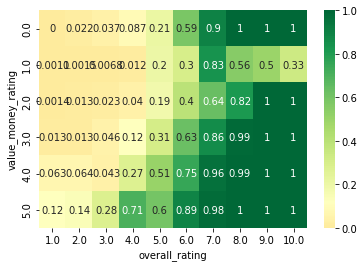

In [183]:
result = pd.pivot_table(data=data, index='value_money_rating', columns='overall_rating',values='recommended')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

cabin_staff_rating       0.0       1.0       2.0       3.0       4.0       5.0
value_money_rating                                                            
0.0                 5.905759  1.620690  2.466667  3.388889  4.857143  6.555556
1.0                 1.454545  1.265942  1.655802  1.837248  2.092715  2.483871
2.0                 1.800000  2.124601  2.621849  2.948174  3.432049  4.309091
3.0                 4.200000  2.767267  3.802253  4.675788  5.767496  7.079023
4.0                 5.615385  3.373563  5.180505  6.359914  7.587004  8.548050
5.0                 8.250000  4.777778  5.811111  7.390909  8.452508  9.325876


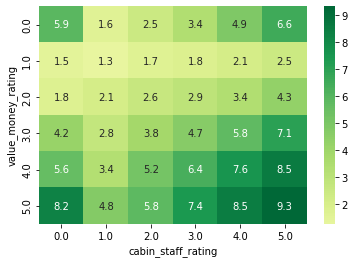

In [184]:
result = pd.pivot_table(data=data, index='value_money_rating', columns='cabin_staff_rating',values='overall_rating')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

### Data Mining Models - Cross Val Scores and summaries

We have used Linear Regression, Logistic Regression, Decision Tree Classifier, and K Nearest Neighbour. <br> 
We will first perform cross validation scores to find which model is better and then try to fit the model and predict. <br>
Test Bed: <br>
1. We will be testing the data with three features. <br>
  a. feature 1 will be 10 columns data without 'recommended', 'author' columns from data frame. The textual will be Encoded and standardized using StandardScalar.  <br>
  b. feature 2 will be just one single column 'overall_rating' which is normalized using L2 norm. <br>
  c. feature 3 will be combination of above two features which consists of 11 columns.
2. Once we get the best cross val scores, we will train, fit and test the model with same features.


In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [307]:
feature1 = data.drop(['recommended', 'author'], axis=1)

In [308]:
feature1.shape

(27283, 10)

In [309]:
target = data['recommended']

In [310]:
target.value_counts()

1    16476
0    10807
Name: recommended, dtype: int64

In [317]:
feature1['date'] = LabelEncoder().fit_transform(feature1['date'])
feature1['author_country'] = LabelEncoder().fit_transform(feature1['author_country'])
feature1['cabin_flown'] = LabelEncoder().fit_transform(feature1['cabin_flown'])
feature1['airline_name'] = LabelEncoder().fit_transform(feature1['airline_name'])
feature1 = StandardScaler().fit_transform(feature1)

In [318]:
f2 = [data['overall_rating']]

In [319]:
Data_normalizer = Normalizer(norm='l2').fit(f2)
feature2 = Data_normalizer.transform(f2)

In [320]:
feature2 = feature2.transpose()

In [321]:
feature2.shape

(27283, 1)

In [331]:
feature3 = np.concatenate((feature1, feature2), axis=1)
feature3.shape

(27283, 11)

In [332]:
# from sklearn.naive_bayes import R
clfs = {'LinearRegression': LinearRegression(), 'DecisionTree': DecisionTreeClassifier(),
       'LogisticRegression': LogisticRegression(), 'knn_model ': KNeighborsClassifier(n_neighbors=5)}
x = []
y = []
z = []
for name, clf in clfs.items():
    x.append({'Classifier': name, 'Feature': 'feature 1', 'cross_val_score': cross_val_score(clf, feature1, target, cv=5).mean()})
    y.append({'Classifier': name, 'Feature': 'feature 2', 'cross_val_score': cross_val_score(clf, feature2, target, cv=5).mean()})
    z.append({'Classifier': name, 'Feature': 'feature 3', 'cross_val_score': cross_val_score(clf, feature3, target, cv=5).mean()})
    print (name)

LinearRegression
DecisionTree
LogisticRegression
knn_model 


In [333]:
result = pd.DataFrame(columns=['Classifier', 'Feature', 'cross_val_score'])
for i in range(4):
    result = result.append(x[i], ignore_index=True)
    result = result.append(y[i], ignore_index=True)
    result = result.append(z[i], ignore_index=True)
result

,Classifier,Feature,cross_val_score
0,LinearRegression,feature 1,0.763934
1,LinearRegression,feature 2,0.757340
2,LinearRegression,feature 3,0.763934
3,DecisionTree,feature 1,0.777692
4,DecisionTree,feature 2,0.943371
5,DecisionTree,feature 3,0.775749
6,LogisticRegression,feature 1,0.944800
7,LogisticRegression,feature 2,0.603893
8,LogisticRegression,feature 3,0.944800
9,knn_model,feature 1,0.933072


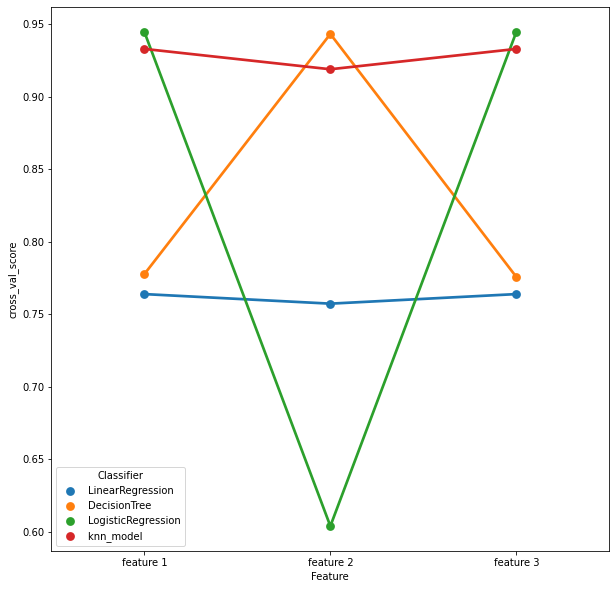

In [334]:
ax, fig = plt.subplots(figsize=(10, 10))
sns.pointplot(x="Feature", y="cross_val_score", hue = 'Classifier', data=result)

The cross vaslidation scores of Logistic regression is above 90 for feature 1 and 3. While Decision Tree classfier has good score for feature 2.

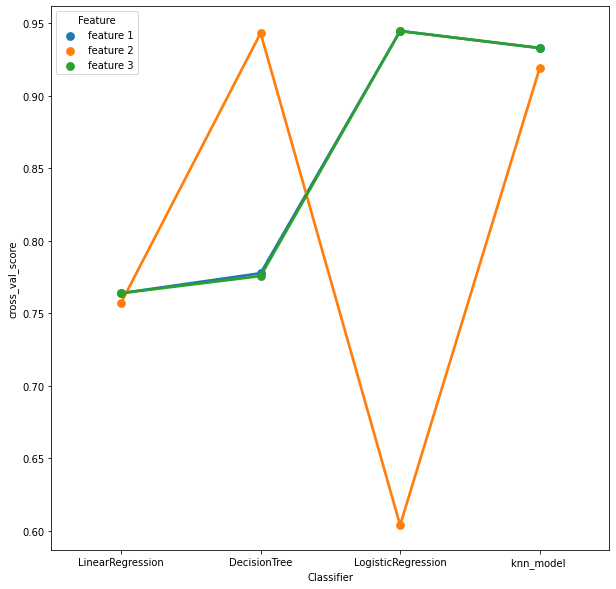

In [335]:
ax, fig = plt.subplots(figsize=(10, 10))
sns.pointplot(x="Classifier", y="cross_val_score", hue = 'Feature', data=result)

Now we will train and test the model and get the accuracies, confusion matrix.

In [336]:
clfs = {'LinearRegression': LinearRegression(), 'DecisionTree': DecisionTreeClassifier(),
       'LogisticRegression': LogisticRegression(), 'knn_model ': KNeighborsClassifier(n_neighbors=5)}

print("Training and testing models for feature 1")

for name, clf in clfs.items():
    originalClass = []
    predictedClass = []
    score = []
    cv = StratifiedKFold(n_splits=5)
    print (name)

    X_train,X_test,y_train,y_test = train_test_split(feature1,target,test_size = 0.2,random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    originalClass.extend(y_test)
    predictedClass.extend(y_pred)

    if name=='LinearRegression':
        score.append(accuracy_score(y_test, y_pred.round()))
        print ('Model Score: ',sum(score)/float(len(score)))
        print ('R2 Score: ',r2_score(originalClass, predictedClass))
    else:
        score.append(accuracy_score(y_test, y_pred))
        print ('Model Score: ',sum(score)/float(len(score)))
        print('Classification Report: ')
        print (classification_report(originalClass, predictedClass))
    print('-------------------------------------------------------------------')

Training and testing models for feature 1
LinearRegression
Model Score:  0.9459409932197178
R2 Score:  0.7649713137347569
-------------------------------------------------------------------
DecisionTree
Model Score:  0.922301630932747
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2140
           1       0.94      0.93      0.94      3317

    accuracy                           0.92      5457
   macro avg       0.92      0.92      0.92      5457
weighted avg       0.92      0.92      0.92      5457

-------------------------------------------------------------------
LogisticRegression
Model Score:  0.9455744914788345
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2140
           1       0.96      0.95      0.96      3317

    accuracy                           0.95      5457
   macro avg       0.94      0.94      0.94      545

In [337]:
clfs = {'LinearRegression': LinearRegression(), 'DecisionTree': DecisionTreeClassifier(),
       'LogisticRegression': LogisticRegression(), 'knn_model ': KNeighborsClassifier(n_neighbors=5)}

print("Training and testing models for feature 2")

for name, clf in clfs.items():
    originalClass = []
    predictedClass = []
    score = []
    cv = StratifiedKFold(n_splits=5)
    print (name)

    X_train,X_test,y_train,y_test = train_test_split(feature2,target,test_size = 0.2,random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    originalClass.extend(y_test)
    predictedClass.extend(y_pred)

    if name=='LinearRegression':
        score.append(accuracy_score(y_test, y_pred.round()))
        print ('Model Score: ',sum(score)/float(len(score)))
        print ('R2 Score: ',r2_score(originalClass, predictedClass))
    else:
        score.append(accuracy_score(y_test, y_pred))
        print ('Model Score: ',sum(score)/float(len(score)))
        print('Classification Report: ')
        print (classification_report(originalClass, predictedClass))
    print('-------------------------------------------------------------------')

Training and testing models for feature 2
LinearRegression
Model Score:  0.9422759758108851
R2 Score:  0.7574986169625068
-------------------------------------------------------------------
DecisionTree
Model Score:  0.9422759758108851
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2140
           1       0.96      0.94      0.95      3317

    accuracy                           0.94      5457
   macro avg       0.94      0.94      0.94      5457
weighted avg       0.94      0.94      0.94      5457

-------------------------------------------------------------------
LogisticRegression
Model Score:  0.6078431372549019
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2140
           1       0.61      1.00      0.76      3317

    accuracy                           0.61      5457
   macro avg       0.30      0.50      0.38      54

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Score:  0.9422759758108851
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2140
           1       0.96      0.94      0.95      3317

    accuracy                           0.94      5457
   macro avg       0.94      0.94      0.94      5457
weighted avg       0.94      0.94      0.94      5457

-------------------------------------------------------------------


In [338]:
clfs = {'LinearRegression': LinearRegression(), 'DecisionTree': DecisionTreeClassifier(),
       'LogisticRegression': LogisticRegression(), 'knn_model ': KNeighborsClassifier(n_neighbors=5)}

print("Training and testing models for feature 3")

for name, clf in clfs.items():
    originalClass = []
    predictedClass = []
    score = []
    cv = StratifiedKFold(n_splits=5)
    print (name)

    X_train,X_test,y_train,y_test = train_test_split(feature3,target,test_size = 0.2,random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    originalClass.extend(y_test)
    predictedClass.extend(y_pred)

    if name=='LinearRegression':
        score.append(accuracy_score(y_test, y_pred.round()))
        print ('Model Score: ',sum(score)/float(len(score)))
        print ('R2 Score: ',r2_score(originalClass, predictedClass))
    else:
        score.append(accuracy_score(y_test, y_pred))
        print ('Model Score: ',sum(score)/float(len(score)))
        print('Classification Report: ')
        print (classification_report(originalClass, predictedClass))
    print('-------------------------------------------------------------------')

Training and testing models for feature 3
LinearRegression
Model Score:  0.9459409932197178
R2 Score:  0.7649713137347569
-------------------------------------------------------------------
DecisionTree
Model Score:  0.9206523730987722
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2140
           1       0.94      0.93      0.93      3317

    accuracy                           0.92      5457
   macro avg       0.92      0.92      0.92      5457
weighted avg       0.92      0.92      0.92      5457

-------------------------------------------------------------------
LogisticRegression
Model Score:  0.9455744914788345
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2140
           1       0.96      0.95      0.96      3317

    accuracy                           0.95      5457
   macro avg       0.94      0.94      0.94      54

### Data Mining - Individual Models

#### Linear Regression
References:
1. https://www.geeksforgeeks.org/linear-regression-python-implementation/
2. https://realpython.com/linear-regression-in-python/
3. And Homework assignment

In [366]:
factors = ['airline_name', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'date']
X = pd.DataFrame(data[factors].copy())
y = data['recommended'].copy()

In [367]:
X

,airline_name,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,date
0,adria-airways,Germany,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4/2015
1,adria-airways,United States,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1/2015
2,adria-airways,Switzerland,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9/2014
3,adria-airways,Singapore,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9/2014
4,adria-airways,Poland,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6/2014
...,...,...,...,...,...,...,...,...,...,...
41207,wizz-air,United Kingdom,Economy,7.0,3.0,3.0,0.0,0.0,5.0,10/2012
41210,wizz-air,United Kingdom,Economy,2.0,1.0,3.0,3.0,0.0,2.0,10/2012
41213,wizz-air,United Kingdom,Economy,1.0,2.0,1.0,0.0,0.0,3.0,10/2012
41216,wizz-air,United Kingdom,Economy,5.0,3.0,4.0,2.0,1.0,4.0,10/2012


In [341]:
data.columns

Index(['airline_name', 'author', 'author_country', 'cabin_flown',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'value_money_rating', 'recommended', 'date'],
      dtype='object')

In [374]:
X['date'] = LabelEncoder().fit_transform(X['date'])
X['author_country'] = LabelEncoder().fit_transform(X['author_country'])
X['cabin_flown'] = LabelEncoder().fit_transform(X['cabin_flown'])
X['airline_name'] = LabelEncoder().fit_transform(X['airline_name'])
feature1 = StandardScaler().fit_transform(feature1)

In [375]:
X

,airline_name,author_country,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,date
0,0,47,1,7.0,4.0,4.0,4.0,0.0,4.0,27
1,0,134,0,10.0,4.0,5.0,4.0,1.0,5.0,3
2,0,123,1,9.0,5.0,5.0,4.0,0.0,5.0,46
3,0,114,0,8.0,4.0,4.0,3.0,1.0,4.0,46
4,0,104,1,4.0,4.0,2.0,1.0,2.0,2.0,34
...,...,...,...,...,...,...,...,...,...,...
41207,287,133,1,7.0,3.0,3.0,0.0,0.0,5.0,5
41210,287,133,1,2.0,1.0,3.0,3.0,0.0,2.0,5
41213,287,133,1,1.0,2.0,1.0,0.0,0.0,3.0,5
41216,287,133,1,5.0,3.0,4.0,2.0,1.0,4.0,5


In [376]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [377]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [378]:
predict = reg_model.predict(X_test)

In [379]:
accuracy_score(y_test, predict.round()) 

0.9459409932197178

In [380]:
new = np.asarray(y_test)
confusion_matrix(y_test, predict.round())

array([[1995,  145],
       [ 150, 3167]])

In [381]:
print(classification_report(y_test, predict.round()))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2140
           1       0.96      0.95      0.96      3317

    accuracy                           0.95      5457
   macro avg       0.94      0.94      0.94      5457
weighted avg       0.95      0.95      0.95      5457



In [395]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))
    
# Model intercept
intercept = reg_model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for airline_name is -1.1391809555757178e-05
The coefficient for author_country is -8.353375883757156e-05
The coefficient for cabin_flown is 0.0009852439514306992
The coefficient for overall_rating is 0.11072721648204956
The coefficient for seat_comfort_rating is 0.0038880002775336995
The coefficient for cabin_staff_rating is 0.0182538150885649
The coefficient for food_beverages_rating is 0.0011439685873684037
The coefficient for inflight_entertainment_rating is -0.0033319452006229993
The coefficient for value_money_rating is 0.04024583652844989
The coefficient for date is -0.0001047793859865346
The intercept for our model is -0.2673133825947529


#### Decision Tree Classifier
References:
1. https://scikit-learn.org/stable/modules/tree.html
2. https://www.datacamp.com/tutorial/decision-tree-classification-python

In [383]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [384]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

In [385]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [386]:
test_pred_decision_tree = clf.predict(X_test)

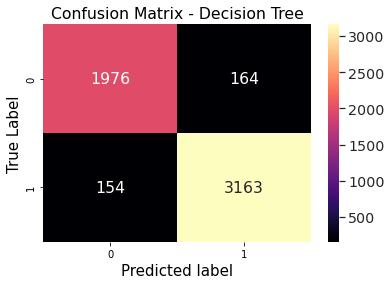

<Figure size 720x504 with 0 Axes>

In [387]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
# ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [388]:
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.9417262231995602

In [389]:
# extract importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=True, inplace = True)
print(importance)

                         feature  importance
0                   airline_name       0.000
1                 author_country       0.000
2                    cabin_flown       0.000
4            seat_comfort_rating       0.000
5             cabin_staff_rating       0.000
6          food_beverages_rating       0.000
7  inflight_entertainment_rating       0.000
9                           date       0.000
8             value_money_rating       0.009
3                 overall_rating       0.991


In [390]:
print(metrics.classification_report(y_test,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2140
           1       0.95      0.95      0.95      3317

    accuracy                           0.94      5457
   macro avg       0.94      0.94      0.94      5457
weighted avg       0.94      0.94      0.94      5457



[Text(0.5, 0.875, 'X[3] <= 5.5\ngini = 0.479\nsamples = 21826\nvalue = [8667, 13159]'),
 Text(0.25, 0.625, 'X[3] <= 4.5\ngini = 0.147\nsamples = 8855\nvalue = [8146, 709]'),
 Text(0.125, 0.375, 'X[3] <= 3.5\ngini = 0.048\nsamples = 7363\nvalue = [7182, 181]'),
 Text(0.0625, 0.125, 'gini = 0.022\nsamples = 6384\nvalue = [6313, 71]'),
 Text(0.1875, 0.125, 'gini = 0.199\nsamples = 979\nvalue = [869, 110]'),
 Text(0.375, 0.375, 'X[8] <= 3.5\ngini = 0.457\nsamples = 1492\nvalue = [964, 528]'),
 Text(0.3125, 0.125, 'gini = 0.395\nsamples = 1035\nvalue = [755, 280]'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 457\nvalue = [209, 248]'),
 Text(0.75, 0.625, 'X[3] <= 6.5\ngini = 0.077\nsamples = 12971\nvalue = [521, 12450]'),
 Text(0.625, 0.375, 'X[8] <= 2.5\ngini = 0.438\nsamples = 1101\nvalue = [356, 745]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 102\nvalue = [63, 39]'),
 Text(0.6875, 0.125, 'gini = 0.415\nsamples = 999\nvalue = [293, 706]'),
 Text(0.875, 0.375, 'X[8] <= 3.5\ngini = 

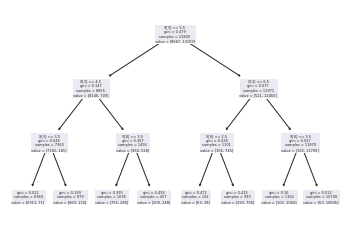

In [415]:
from sklearn import tree
tree.plot_tree(clf)

#### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression

In [397]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [398]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [400]:
predict = log_reg_model.predict(X_test)

In [401]:
accuracy_score(y_test, predict)

0.9358621953454279

In [405]:
print(classification_report(y_test, predict.round()))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2140
           1       0.94      0.96      0.95      3317

    accuracy                           0.94      5457
   macro avg       0.93      0.93      0.93      5457
weighted avg       0.94      0.94      0.94      5457



#### K Nearest Neighbour

In [406]:
from sklearn.neighbors import KNeighborsClassifier

In [407]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [408]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [409]:
predict = knn_model.predict(X_test)

In [410]:
accuracy_score(y_test, predict)

0.9120395821880154

In [412]:
print(classification_report(predict.round(), y_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1986
           1       0.95      0.91      0.93      3471

    accuracy                           0.91      5457
   macro avg       0.90      0.91      0.91      5457
weighted avg       0.91      0.91      0.91      5457



### Association Rules Mining

#### Apriori Algorithm
References:
1. https://intellipaat.com/blog/data-science-apriori-algorithm/
2. https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/
3. https://analyticsindiamag.com/beginners-guide-to-understanding-apriori-algorithm-with-implementation-in-python/
4. https://libraries.io/pypi/apyori

In [444]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=ec48d9a659252887ca5d6577a278e512670f3907dbab29df14805d2c632648b4
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [445]:
from apyori import apriori

In [480]:

data.pop('author')
data.pop('author_country')
data.pop('cabin_flown')
data.pop('seat_comfort_rating')
data.pop('cabin_staff_rating')
data.pop('food_beverages_rating')
data.pop('inflight_entertainment_rating')
data.pop('value_money_rating')
data.pop('date')
# ['airline_name', 'author', 'author_country', 'cabin_flown',
#        'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
#        'food_beverages_rating', 'inflight_entertainment_rating',
#        'value_money_rating', 'recommended', 'date'

0         4/2015
1         1/2015
2         9/2014
3         9/2014
4         6/2014
          ...   
41207    10/2012
41210    10/2012
41213    10/2012
41216    10/2012
41217    10/2012
Name: date, Length: 27283, dtype: object

In [499]:
data['recommended'] = data['recommended'].replace(1,'Yes')
data['recommended'] = data['recommended'].replace(0,'No')

In [500]:
data.head()

,airline_name,overall_rating,recommended
0,adria-airways,7.0,Yes
1,adria-airways,10.0,Yes
2,adria-airways,9.0,Yes
3,adria-airways,8.0,Yes
4,adria-airways,4.0,No


In [501]:
data.shape

(27283, 3)

In [502]:
transacts = []
# populating a list of transactions
for i in range(0, 27283): 
  transacts.append([str(data.values[i,j]) for j in range(0, 3)])

In [503]:
transacts

[['adria-airways', '7.0', 'Yes'],
 ['adria-airways', '10.0', 'Yes'],
 ['adria-airways', '9.0', 'Yes'],
 ['adria-airways', '8.0', 'Yes'],
 ['adria-airways', '4.0', 'No'],
 ['adria-airways', '9.0', 'Yes'],
 ['adria-airways', '5.0', 'Yes'],
 ['adria-airways', '9.0', 'Yes'],
 ['adria-airways', '8.0', 'Yes'],
 ['adria-airways', '10.0', 'Yes'],
 ['adria-airways', '9.0', 'Yes'],
 ['adria-airways', '7.0', 'Yes'],
 ['adria-airways', '8.0', 'Yes'],
 ['adria-airways', '7.0', 'Yes'],
 ['adria-airways', '7.0', 'Yes'],
 ['adria-airways', '5.0', 'Yes'],
 ['adria-airways', '9.0', 'Yes'],
 ['aegean-airlines', '8.0', 'Yes'],
 ['aegean-airlines', '9.0', 'Yes'],
 ['aegean-airlines', '10.0', 'Yes'],
 ['aegean-airlines', '8.0', 'Yes'],
 ['aegean-airlines', '10.0', 'Yes'],
 ['aegean-airlines', '9.0', 'Yes'],
 ['aegean-airlines', '10.0', 'Yes'],
 ['aegean-airlines', '7.0', 'Yes'],
 ['aegean-airlines', '8.0', 'Yes'],
 ['aegean-airlines', '10.0', 'Yes'],
 ['aegean-airlines', '9.0', 'Yes'],
 ['aegean-airlines', 

In [539]:
association_rules = apriori(transacts, min_support=0.0005, min_confidence=0.0005, min_length=4, min_lift=2)

In [540]:
output = list(association_rules) # returns a non-tabular output
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[0]) for result in output]
    # rhs         = [tuple(result[2][0][1]) for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(output), columns = ['rule', 'Support', 'Confidence', 'Lift'])

In [541]:
output_DataFrame.head(50)

,rule,Support,Confidence,Lift
0,"(1.0, No)",0.142653,0.996416,2.515519
1,"(1.0, air-canada)",0.005058,0.035330,2.008157
2,"(air-canada-rouge, 1.0)",0.015064,0.105223,4.083630
3,"(1.0, american-airlines)",0.009273,0.064772,3.052122
4,"(frontier-airlines, 1.0)",0.002749,0.019201,2.632498
5,"(1.0, royal-air-maroc)",0.000880,0.006144,2.748155
6,"(spirit-airlines, 1.0)",0.003482,0.024322,5.065382
7,"(sunwing-airlines, 1.0)",0.005938,0.041475,3.017475
8,"(1.0, united-airlines)",0.013965,0.097542,3.314128
9,"(aeromexico, 10.0)",0.000880,0.005390,2.042294
